In [25]:
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# 이미지 파일의 크기
width = 28
height = 28

In [27]:
# 1. 데이터세트 생성
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련 데이터세트와 시험 데이터세트 불러오기

print("훈련 데이터(x): ", x_train.shape, x_train.dtype)
print("훈련 데이터(y): ", y_train.shape, y_train.dtype)
print("시험 데이터(x): ", x_test.shape, x_test.dtype)
print("시험 데이터(y): ", y_test.shape, y_test.dtype)

훈련 데이터(x):  (60000, 28, 28) uint8
훈련 데이터(y):  (60000,) uint8
시험 데이터(x):  (10000, 28, 28) uint8
시험 데이터(y):  (10000,) uint8


In [28]:
# 입력(x) 데이터 shape 변경: (28, 28) -> (784)
x_train = x_train.reshape(60000, width*height).astype('float32')/255.0
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0

In [29]:
# 훈련 데이터세트와 검증 데이터세트 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [30]:
# 정답 레이블: one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [31]:
# 데이터세트 shape, dtype 확인
print("훈련 데이터(x): ", x_train.shape, x_train.dtype)
print("훈련 데이터(y): ", y_train.shape, y_train.dtype)
print("검증 데이터(x): ", x_val.shape, x_val.dtype)
print("검증 데이터(y): ", y_val.shape, y_val.dtype)
print("시험 데이터(x): ", x_test.shape, x_test.dtype)
print("시험 데이터(y): ", y_test.shape, y_test.dtype)

훈련 데이터(x):  (50000, 784) float32
훈련 데이터(y):  (50000, 10) float32
검증 데이터(x):  (10000, 784) float32
검증 데이터(y):  (10000, 10) float32
시험 데이터(x):  (10000, 784) float32
시험 데이터(y):  (10000, 10) float32


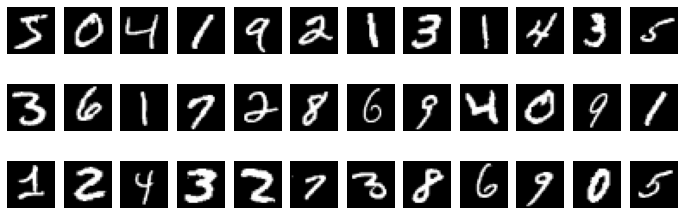

In [32]:
# 훈련 데이터세트 확인해보기
plt.figure(figsize=(12,4))
for i in range(36):
  plt.subplot(3, 12, i+1)
  plt.imshow(x_train[i].reshape(width, height), cmap='gray')
  plt.axis("off")
plt.show()

In [33]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 만들어진 모델 내부 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2193 - accuracy: 0.9343 - val_loss: 0.1072 - val_accuracy: 0.9680
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0982 - accuracy: 0.9705 - val_loss: 0.1016 - val_accuracy: 0.9704
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0894 - val_accuracy: 0.9749
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0916 - val_accuracy: 0.9742
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0860 - val_accuracy: 0.9782
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0806 - val_accuracy: 0.9784
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.1266 - val_accuracy:

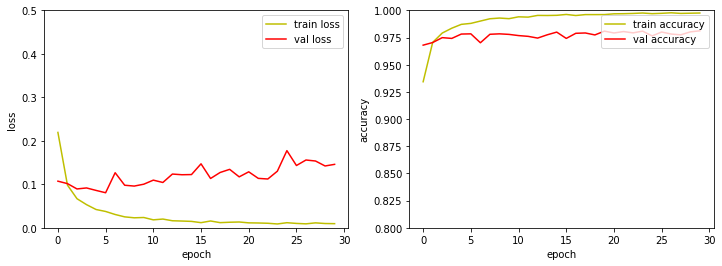

In [36]:
# 5. 학습과정 살펴보기
plt.figure(figsize=(12,4))

# 에러값(loss) 그래프
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
plt.ylim([0.0, 0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

# 정확도(accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'y', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
plt.ylim([0.8, 1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()

In [45]:
# 6. 모델 평가하기
loss_acc = model.evaluate(x_test, y_test)
print(loss_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.9788
[0.15684932470321655, 0.9787999987602234]


In [55]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [57]:
model.save('/content/drive/MyDrive/Colab Notebooks/인공지능/10주차/mnist.model.h5')